In [151]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

# Standard Conditions

In [152]:
inchHg= 29.03 # inch Hg for calculating pressure
inchTOm = 25.4 * 1e-3 # inch to m conversion
T = 23.01 + 273.15 # K
g = 9.81 # m/s^2 gravity
R = 287.05 # J/(kg K) specific gas constant of air

# desnity from temperature calculation
rho_Hg = 13545 # kg/m^3 density of mercury
rho_H2O = 1000 # kg/m^3 density of water

u_rho_Hg = 0.0 # relative uncertainty in density of mercury
u_inchesHg = 0.001 / inchHg # relative uncertainty of measured inches of mercury


In [153]:
P0 =  rho_Hg * g * inchHg * inchTOm # Pa
u_P0 = u_rho_Hg + u_inchesHg # relative uncertainty in pressure

print(f"The Atmospheric Pressure is {P0} Pa")

# density of air calculation
rho_air = P0 / (R * T) # kg/m^3
u_rho_air = u_P0 + 0.01 / T # relative uncertainty in density of air
print(f"The density of air is {rho_air} kg/m^3")

The Atmospheric Pressure is 97978.04492490001 Pa
The density of air is 1.1525103032207134 kg/m^3


In [154]:
oriface_diameter = 17.47 * 1e-3 # mm to m
oriface_area = np.pi * oriface_diameter**2 / 4 # m^2

pipe_area = 10 * oriface_area # ?
print(f"The area of the oriface is {oriface_area} m^2")

# flow rate calculation
Cd = 0.62
def calc_mfr(dh):
    dp = rho_H2O * g * dh
    rA = oriface_area / pipe_area
    Q = Cd * oriface_area * np.sqrt(2 * dp / (rho_air)) 
    return rho_air * Q

def calc_u_mfr(dh):
    u_dh = np.sqrt(2) * 0.5e-2 / dh
    u_D = 0.01 / 17.47 # relative uncertainty in diameter

    return 2 * u_D + 0.5 * u_dh + 0.5 * u_rho_air
    


    

C1_dh_oriface = 13.2 - 9.6
C2_dh_oriface = 13.7 - 8.8
C3_dh_oriface = 13.7 - 8.8
C4_dh_oriface = 13.7 - 8.8

C1_md, C1_u_md = 1e3 * calc_mfr(C1_dh_oriface * 1e-2), calc_u_mfr(C1_dh_oriface * 1e-2) # 1e-3 kg/s
C2_md, C2_u_md = 1e3 * calc_mfr(C2_dh_oriface * 1e-2), calc_u_mfr(C2_dh_oriface * 1e-2) # 1e-3 kg/s
C3_md, C3_u_md = 1e3 * calc_mfr(C3_dh_oriface * 1e-2), calc_u_mfr(C3_dh_oriface * 1e-2) # 1e-3 kg/s
C4_md, C4_u_md = 1e3 * calc_mfr(C4_dh_oriface * 1e-2), calc_u_mfr(C4_dh_oriface * 1e-2) # 1e-3 kg/s

print(f"The mass flow rate for C1 is {C1_md} +- {C1_md * C1_u_md} kg/s")
print(f"The mass flow rate for C2 is {C2_md} +- {C2_md * C2_u_md} kg/s")
print(f"The mass flow rate for C3 is {C3_md} +- {C3_md * C3_u_md} kg/s")
print(f"The mass flow rate for C4 is {C4_md} +- {C4_md * C4_u_md} kg/s")


The area of the oriface is 0.00023970422632724826 m^2
The mass flow rate for C1 is 4.240241000042539 +- 0.4214455780007432 kg/s
The mass flow rate for C2 is 4.946947833382961 +- 0.36279119964855566 kg/s
The mass flow rate for C3 is 4.946947833382961 +- 0.36279119964855566 kg/s
The mass flow rate for C4 is 4.946947833382961 +- 0.36279119964855566 kg/s


# Static Pressure graph

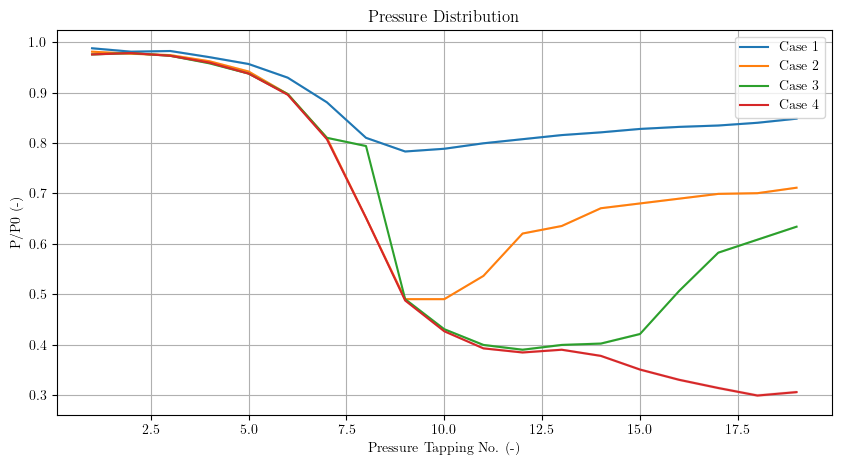

In [155]:
def get_rp(tab):
    dh = (tab[:,2] - tab[:,1]) * 1e-2 # m
    p = P0 - rho_Hg * g * dh

    return p / P0

def get_u_rp(tab):
    h1 = tab[:,1]
    h2 = tab[:,2]

    u_h1 = 0.1 / h1 # accuracy of 0.1 mm
    u_h2 = 0.1 / h2 # accuracy of 0.1 mm
    
    u_rp = u_P0 + u_rho_Hg + np.sqrt(u_h1**2 + u_h2**2)
    return u_rp


C1 = np.loadtxt('case1.txt', skiprows=1)
C1_rp, C1_u_rp = get_rp(C1), get_u_rp(C1)
C2 = np.loadtxt('case2.txt', skiprows=1)
C2_rp, C2_u_rp = get_rp(C2), get_u_rp(C2)
C3 = np.loadtxt('case3.txt', skiprows=1)
C3_rp, C3_u_rp = get_rp(C3), get_u_rp(C3)
C4 = np.loadtxt('case4.txt', skiprows=1)
C4_rp, C4_u_rp = get_rp(C4), get_u_rp(C4)

C3_SHOCK_LOCATION = 15

fig,ax = plt.subplots(figsize=(10,5))
x = C1[:,0]
ax.plot(x, C1_rp, label='Case 1')
ax.fill_between(x, C1_rp * (1 - C1_u_rp), C1_rp * (1 + C1_u_rp), alpha=0.2)
ax.plot(x, C2_rp, label='Case 2')
ax.fill_between(x, C2_rp * (1 - C2_u_rp), C2_rp * (1 + C2_u_rp), alpha=0.2)
ax.plot(x, C3_rp , label='Case 3')
ax.fill_between(x, C3_rp * (1 - C3_u_rp), C3_rp * (1 + C3_u_rp), alpha=0.2)
ax.plot(x, C4_rp, label='Case 4')
ax.fill_between(x, C4_rp * (1 - C4_u_rp), C4_rp * (1 + C4_u_rp), alpha=0.2)

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('P/P0 (-)')
plt.title('Pressure Distribution')
plt.legend()
plt.grid()
plt.show()

# Mach number graph

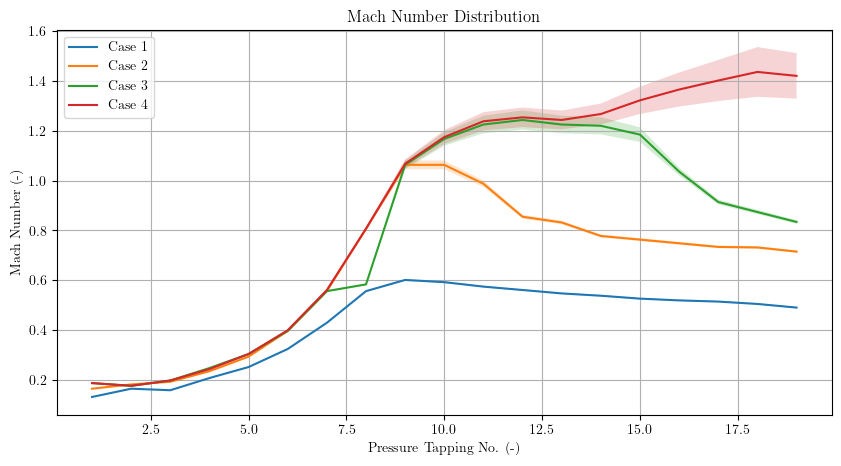

In [156]:

def calc_M(rp):
    # calc mach number from pressure ratio
    g = 1.4
    M2 = (rp ** -((g-1)/g) - 1) * 2 / (g - 1)
    return np.sqrt(M2)

def calc_u_M(rp, u_rp):
    # u_M = u_rp * dM/drp

    g = 1.4
    dM2 = - 2 / g * rp ** (-((g-1)/g) - 1)
    u_M = u_rp * dM2
    return u_M

C1_M, C1_u_M = calc_M(C1_rp), calc_u_M(C1_rp, C1_u_rp)
C2_M, C2_u_M = calc_M(C2_rp), calc_u_M(C2_rp, C2_u_rp)
C3_M, C3_u_M = calc_M(C3_rp), calc_u_M(C3_rp, C3_u_rp)
C4_M, C4_u_M = calc_M(C4_rp), calc_u_M(C4_rp, C4_u_rp)


fig,ax = plt.subplots(figsize=(10,5))
ax.plot(C1[:,0], C1_M, label='Case 1')
ax.fill_between(x, C1_M * (1 - C1_u_M), C1_M * (1 + C1_u_M), alpha=0.2)
ax.plot(C2[:,0], C2_M, label='Case 2')
ax.fill_between(x, C2_M * (1 - C2_u_M), C2_M * (1 + C2_u_M), alpha=0.2)
ax.plot(C3[:,0], C3_M, label='Case 3')
ax.fill_between(x, C3_M * (1 - C3_u_M), C3_M * (1 + C3_u_M), alpha=0.2)
ax.plot(C4[:,0], C4_M, label='Case 4')
ax.fill_between(x, C4_M * (1 - C4_u_M), C4_M * (1 + C4_u_M), alpha=0.2)

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Mach Number (-)')
plt.title('Mach Number Distribution')
plt.legend()
plt.grid()
plt.show()


# Continuation of Case 3 from shock location

In [157]:
import sympy as sp

def Ms_from_M(M):
    g = 1.4
    return np.sqrt((1 + (g - 1) / 2 * M**2) / (g * M**2 - (g - 1) / 2))

def rP0s_from_M(M):
    g = 1.4
    return (((g + 1) / 2 * M**2) / (1 + (g - 1) / 2 * M **2)) ** (g / (g - 1)) * (2 * g / (g + 1) * M**2 - (g - 1) / (g + 1)) ** - (1 / (g - 1))

def u_rP0s_from_u_M(Mval, u_M):
    # need analytical derivative of rP0s_from_M
    # using sympy

    M = sp.symbols('M')
    g  = sp.symbols('gamma')
    rP0_expr = (((g + 1) / 2 * M**2) / (1 + (g - 1) / 2 * M **2)) ** (g / (g - 1)) * (2 * g / (g + 1) * M**2 - (g - 1) / (g + 1)) ** - (1 / (g - 1))
    dM_expr = sp.diff(rP0_expr, M)

    tex = sp.latex(dM_expr)
    print(tex)

    # evaluate at M
    dM = dM_expr.evalf(subs={M: Mval, g: 1.4})
    u_rP0s = np.abs(u_M * dM)
    return float(u_rP0s)


u_rp0 = u_rP0s_from_u_M(1.5, 0.1)
print(  u_rp0)

MachNo_before_shock = C4_M[C3_SHOCK_LOCATION]
u_MachNo_before_shock = C4_u_M[C3_SHOCK_LOCATION]

print(f"The Mach Number before the shock is {MachNo_before_shock}")
MachNo_after_shock = Ms_from_M(MachNo_before_shock)
print(f"The Mach Number after the shock is {MachNo_after_shock}")

rPs = rP0s_from_M(MachNo_before_shock)
u_rPs = u_rP0s_from_u_M(MachNo_before_shock, u_MachNo_before_shock)

print(f"The stagnant pressure ratio P0s/P0 is {rPs}")

C3_rp_corrected = C3_rp.copy()
C3_rp_corrected[C3_SHOCK_LOCATION:] /= rPs
C3_u_rp_corrected = C3_u_rp.copy()  
C3_u_rp_corrected[C3_SHOCK_LOCATION:] += u_rPs

C3_rp_corrected[7] = (C3_rp_corrected[6] + C3_rp_corrected[8]) / 2


# find nozzil location
def lerp(x1, x2, y1, y2, x):
    return (y2 - y1) / (x2 - x1) * (x - x1) + y1

def find_nozzil_location(rp, x, y):
    for i in range(len(rp)):
        if rp[i] < 0.5283:
            break
    # linear interpolation
    return lerp(rp[i], rp[i-1], x[i], x[i-1], 0.5283)

exact_nozzil_location = find_nozzil_location(C3_rp_corrected, C3[:,0], C3_rp_corrected)
print(f"Exact nozzil location is {exact_nozzil_location}")
NOZZIL_LOCATION = np.ceil(exact_nozzil_location) - 1


- \frac{4 M \gamma \left(\frac{M^{2} \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1}\right)^{\frac{\gamma}{\gamma - 1}} \left(\frac{2 M^{2} \gamma}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}\right)^{- \frac{1}{\gamma - 1}}}{\left(\gamma - 1\right) \left(\gamma + 1\right) \left(\frac{2 M^{2} \gamma}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}\right)} + \frac{\gamma \left(\frac{M^{2} \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1}\right)^{\frac{\gamma}{\gamma - 1}} \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right) \left(\frac{2 M^{2} \gamma}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}\right)^{- \frac{1}{\gamma - 1}} \left(- \frac{2 M^{3} \left(\frac{\gamma}{2} - \frac{1}{2}\right) \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{\left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)^{2}} + \frac{2 M \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{M^{2} \left(\fra

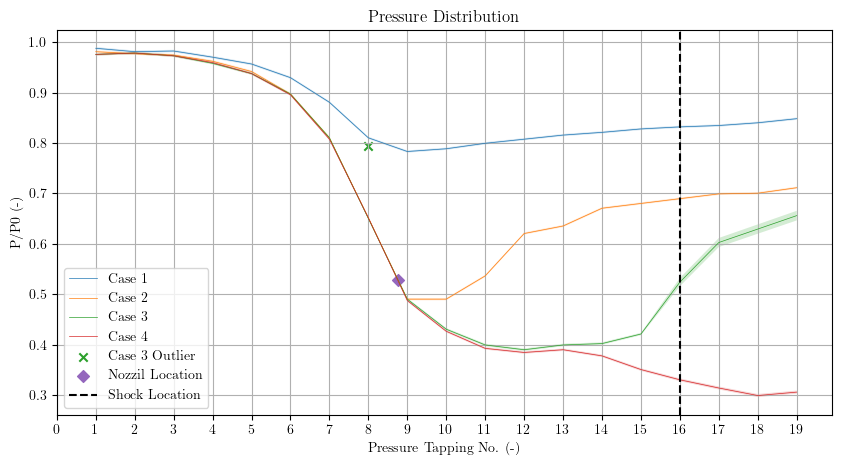

In [158]:

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(C1[:,0], C1_rp, label='Case 1', linewidth = 0.5)
ax.fill_between(C1[:,0], C1_rp * (1 - C1_u_rp), C1_rp * (1 + C1_u_rp), alpha=0.2)
ax.plot(C2[:,0], C2_rp, label='Case 2', linewidth = 0.5)
ax.fill_between(C2[:,0], C2_rp * (1 - C2_u_rp), C2_rp * (1 + C2_u_rp), alpha=0.2)
#ax.plot(C3[:,0], C3_rp, label='Case 3')
ax.plot(C3[:,0], C3_rp_corrected, label='Case 3', linewidth = 0.5)
ax.fill_between(C3[:,0], C3_rp_corrected * (1 - C3_u_rp_corrected), C3_rp_corrected * (1 + C3_u_rp_corrected), alpha=0.2)
ax.plot(C4[:,0], C4_rp, label='Case 4', linewidth=0.5)
ax.fill_between(C4[:,0], C4_rp * (1 - C4_u_rp), C4_rp * (1 + C4_u_rp), alpha=0.2)

ax.scatter(C3[7,0], C3_rp[7], label='Case 3 Outlier', color='C2', marker='x')
ax.scatter(exact_nozzil_location, 0.5283, label='Nozzil Location', marker='D', c='C4')
ax.axvline(C3_SHOCK_LOCATION + 1, label='Shock Location', c='black', linestyle='--')

plt.xticks(np.arange(0, 20, 1))

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('P/P0 (-)')
plt.title('Pressure Distribution')
plt.grid()
plt.legend()

plt.savefig('pressure_ratio_distribution_corrected.png', dpi=300)
plt.show()

# Corrected Mach Diagram

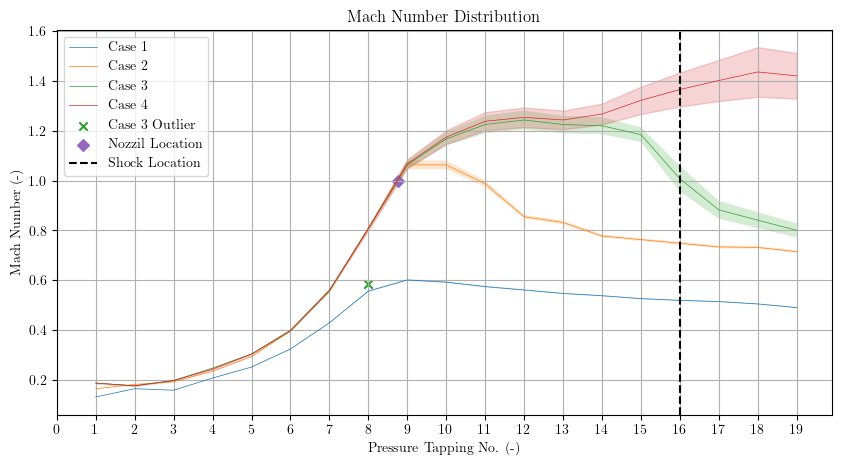

In [159]:

C3_M_corrected = calc_M(C3_rp_corrected)
C3_u_M_corrected = calc_u_M(C3_rp_corrected, C3_u_rp_corrected)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(C1[:,0], C1_M, label='Case 1', linewidth = 0.5)
ax.fill_between(C1[:,0], C1_M * (1 - C1_u_M), C1_M * (1 + C1_u_M), alpha=0.2)
ax.plot(C2[:,0], C2_M, label='Case 2', linewidth = 0.5)
ax.fill_between(C2[:,0], C2_M * (1 - C2_u_M), C2_M * (1 + C2_u_M), alpha=0.2)
#ax.plot(C3[:,0], C3_M, label='Case 3')
ax.plot(C3[:,0], C3_M_corrected, label='Case 3', linewidth = 0.5)
ax.fill_between(C3[:,0], C3_M_corrected * (1 - C3_u_M_corrected), C3_M_corrected * (1 + C3_u_M_corrected), alpha=0.2)
ax.plot(C4[:,0], C4_M, label='Case 4', linewidth = 0.5)
ax.fill_between(C4[:,0], C4_M * (1 - C4_u_M), C4_M * (1 + C4_u_M), alpha=0.2, color='C3')


ax.scatter(C3[7,0], C3_M[7], label='Case 3 Outlier', color='C2', marker='x')
ax.scatter(exact_nozzil_location, 1.0, label='Nozzil Location', marker='D', c='C4')
ax.axvline(C3_SHOCK_LOCATION + 1, label='Shock Location', c='black', linestyle='--')


plt.xticks(np.arange(0, 20, 1))

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Mach Number (-)')
plt.title('Mach Number Distribution')
plt.legend()
plt.grid()
plt.savefig('mach_number_distribution_corrected.png', dpi=300)
plt.show()


In [160]:
NOZZIL_LOCATION = int(NOZZIL_LOCATION)
print(f"The Mach Number at the throat is {C1_M[NOZZIL_LOCATION]:.3f} +- {C1_M[NOZZIL_LOCATION] * C1_u_M[NOZZIL_LOCATION]}")
print(f"The Mach Number at the throat is {C2_M[NOZZIL_LOCATION]:.3f} +- {C2_M[NOZZIL_LOCATION] * C2_u_M[NOZZIL_LOCATION]}")
print(f"The Mach Number at the throat is {C3_M_corrected[NOZZIL_LOCATION]:.3f} +- {C3_M_corrected[NOZZIL_LOCATION] * C3_u_M_corrected[NOZZIL_LOCATION]}")
print(f"The Mach Number at the throat is {C4_M[NOZZIL_LOCATION]:.3f} +- {C4_M[NOZZIL_LOCATION] * C4_u_M[NOZZIL_LOCATION]}")
print()
print(f"The Mach Number at the exit is {C1_M[-1]:.3f} +- {C1_u_M[-1]}")
print(f"The Mach Number at the exit is {C2_M[-1]:.3f} +- {C2_u_M[-1]}")
print(f"The Mach Number at the exit is {C3_M_corrected[-1]:.3f} +- {C3_u_M_corrected[-1]}")
print(f"The Mach Number at the exit is {C4_M[-1]:.3f} +- {C4_u_M[-1]}")


The Mach Number at the throat is 0.602 +- -0.0033215694879609294
The Mach Number at the throat is 1.063 +- -0.017440771981756368
The Mach Number at the throat is 1.063 +- -0.017440771981756368
The Mach Number at the throat is 1.068 +- -0.01749877641048325

The Mach Number at the exit is 0.491 +- -0.0046808389635049855
The Mach Number at the exit is 0.715 +- -0.006734098717421161
The Mach Number at the exit is 0.800 +- -0.035765214631327875
The Mach Number at the exit is 1.420 +- -0.06427523091248791


$0.32x^0+-0.48x^1+0.45x^2+-0.20x^3+0.05x^4+-0.01x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$
$1.38x^0+-2.64x^1+2.08x^2+-0.80x^3+0.17x^4+-0.02x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$
$1.42x^0+-2.62x^1+2.01x^2+-0.76x^3+0.16x^4+-0.02x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$
$1.01x^0+-1.71x^1+1.28x^2+-0.47x^3+0.10x^4+-0.01x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$


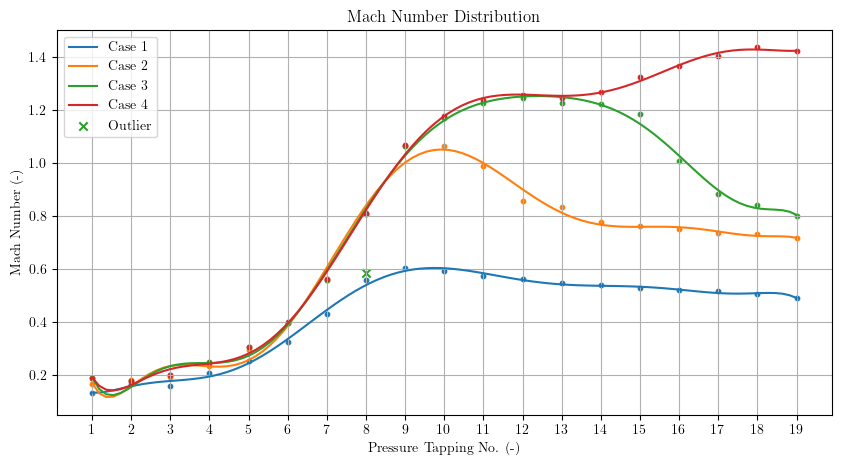

In [161]:

def plot_polyfit(ax, x, y, max_deg, label):

    residuals = []
    for deg in range(max_deg):
        coeff = np.polyfit(x, y, deg)
        p = np.poly1d(coeff)
        xp = np.linspace(x[0], x[-1], 100)
        residual = np.sum((p(x) - y) ** 2)
        residuals.append(residual)

    best_deg = np.argmin(residuals) + 1
    coeff = np.polyfit(x, y, best_deg)
    p = np.poly1d(coeff)
    xp = np.linspace(x[0], x[-1], 100)
    # make tex label
    tex = [f"{c:.2f}x^{i}" for i,c in enumerate(coeff[::-1])]
    tex = '$' + '+'.join(tex) + '$'
    print(tex)
    ax.plot(xp, p(xp), label=label)

fig,ax = plt.subplots(figsize=(10,5))

plt.xticks(np.arange(0, 20, 1))

max_deg = 9
plot_polyfit(ax, C1[:,0], C1_M, max_deg, 'Case 1')
ax.scatter(C1[:,0], C1_M, color='C0', s=10)
plot_polyfit(ax, C2[:,0], C2_M, max_deg, 'Case 2')
ax.scatter(C2[:,0], C2_M, color='C1', s=10)
plot_polyfit(ax, C3[:,0], C3_M_corrected, max_deg, 'Case 3')
ax.scatter(C3[:,0], C3_M_corrected, color='C2', s=10)
plot_polyfit(ax, C4[:,0], C4_M, max_deg, 'Case 4')
ax.scatter(C4[:,0], C4_M, color='C3', s=10)

ax.scatter(C3[7,0], C3_M[7], label='Outlier', color='C2', marker='x')


plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Mach Number (-)')
plt.title('Mach Number Distribution')
plt.legend()
plt.grid()
plt.savefig('mach_number_distribution_corrected_polyfit.png', dpi=300)

# not great results

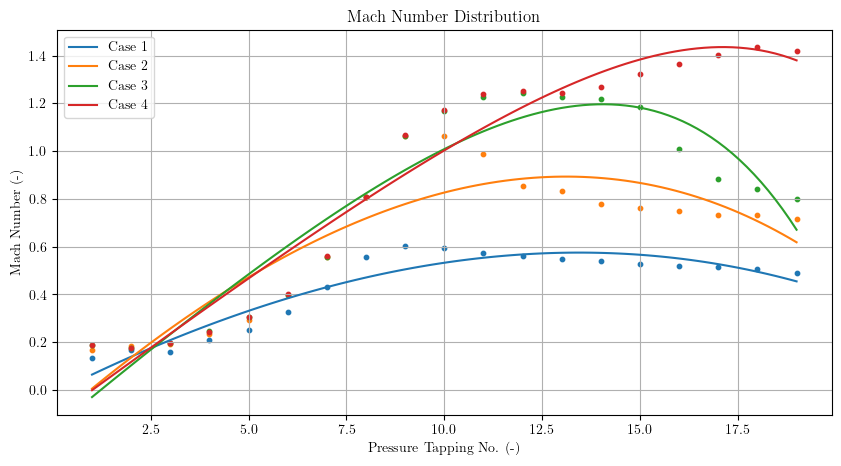

In [162]:
from scipy.optimize import curve_fit

def f(x, a, b, c, d):
    return a + b * x - c * np.exp(-d * x)

def plot_curve_fit(ax, f, x, y, label):
    popt, pcov = curve_fit(f, x, y)
    xp = np.linspace(x[0], x[-1], 100)
    ax.plot(xp, f(xp, *popt), label=label)

fig,ax = plt.subplots(figsize=(10,5))

plot_curve_fit(ax, f, C1[:,0], C1_M, 'Case 1')
ax.scatter(C1[:,0], C1_M, color='C0', s=10)
plot_curve_fit(ax, f, C2[:,0], C2_M, 'Case 2')
ax.scatter(C2[:,0], C2_M, color='C1', s=10)
plot_curve_fit(ax, f, C3[:,0], C3_M_corrected, 'Case 3')
ax.scatter(C3[:,0], C3_M_corrected, color='C2', s=10)
plot_curve_fit(ax, f, C4[:,0], C4_M, 'Case 4')
ax.scatter(C4[:,0], C4_M, color='C3', s=10)

ax.set_xlabel('Pressure Tapping No. (-)')
ax.set_ylabel('Mach Number (-)')
ax.set_title('Mach Number Distribution')
ax.legend()
ax.grid()

plt.show()


# terrible go back to original polyfit

# realised we can do area ratio plot



\frac{2 \left(\frac{2 \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)}{\gamma + 1}\right)^{\frac{\gamma + 1}{2 \gamma - 2}} \left(\frac{\gamma}{2} - \frac{1}{2}\right) \left(\gamma + 1\right)}{\left(2 \gamma - 2\right) \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)} - \frac{\left(\frac{2 \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)}{\gamma + 1}\right)^{\frac{\gamma + 1}{2 \gamma - 2}}}{M^{2}}
\frac{2 \left(\frac{2 \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)}{\gamma + 1}\right)^{\frac{\gamma + 1}{2 \gamma - 2}} \left(\frac{\gamma}{2} - \frac{1}{2}\right) \left(\gamma + 1\right)}{\left(2 \gamma - 2\right) \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)} - \frac{\left(\frac{2 \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)}{\gamma + 1}\right)^{\frac{\gamma + 1}{2 \gamma - 2}}}{M^{2}}
\frac{2 \left(\frac{2 \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\righ

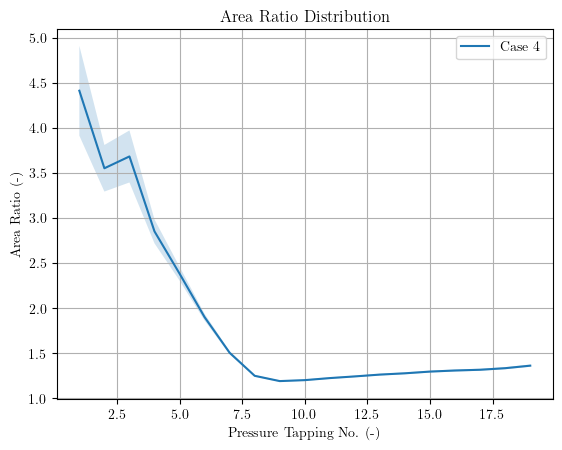

In [163]:

def AAstar(M):
    g = 1.4
    return (1 / M) * ((2 / (g + 1)) * (1 + (g - 1) / 2 * M**2)) ** ((g + 1) / (2 * (g - 1)))

def u_AAstar(Mval, u_M):
    # use sympy
    M = sp.symbols('M')
    g  = sp.symbols('gamma')
    AAstar_expr = (1 / M) * ((2 / (g + 1)) * (1 + (g - 1) / 2 * M**2)) ** ((g + 1) / (2 * (g - 1)))

    dM_expr = sp.diff(AAstar_expr, M)
    tex = sp.latex(dM_expr)
    print(tex)

    # evaluate at M
    out = np.zeros_like(Mval)
    for i in range(len(Mval)):
        out[i] = dM_expr.evalf(subs={M: Mval[i], g: 1.4})

    u_AAstar = np.abs(u_M * out)
    return u_AAstar

C1_AAstar, C1_u_AAstar = AAstar(C1_M), u_AAstar(C1_M, C1_u_M)
C2_AAstar, C2_u_AAstar = AAstar(C2_M), u_AAstar(C2_M, C2_u_M)
C3_AAstar, C3_u_AAstar = AAstar(C3_M_corrected), u_AAstar(C3_M_corrected, C3_u_M_corrected)
C4_AAstar, C4_u_AAstar = AAstar(C1_M), u_AAstar(C1_M, C1_u_M)


fig,ax = plt.subplots()
"""
ax.plot(C1[:,0], C1_AAstar, label='Case 1')
ax.fill_between(x, C1_AAstar * (1 - C1_u_AAstar), C1_AAstar * (1 + C1_u_AAstar), alpha=0.2)
ax.plot(C2[:,0], C2_AAstar, label='Case 2')
ax.fill_between(x, C2_AAstar * (1 - C2_u_AAstar), C2_AAstar * (1 + C2_u_AAstar), alpha=0.2)
ax.plot(C3[:,0], C3_AAstar, label='Case 3')
ax.fill_between(x, C3_AAstar * (1 - C3_u_AAstar), C3_AAstar * (1 + C3_u_AAstar), alpha=0.2)
ax.plot(C4[:,0], C4_AAstar, label='Case 4')
ax.fill_between(x, C4_AAstar * (1 - C4_u_AAstar), C4_AAstar * (1 + C4_u_AAstar), alpha=0.2)
"""
ax.plot(C4[:,0], C4_AAstar, label='Case 4')
ax.fill_between(x, C4_AAstar * (1 - C4_u_AAstar), C4_AAstar * (1 + C4_u_AAstar), alpha=0.2)



plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Area Ratio (-)')

plt.title('Area Ratio Distribution')
plt.legend()
plt.grid()

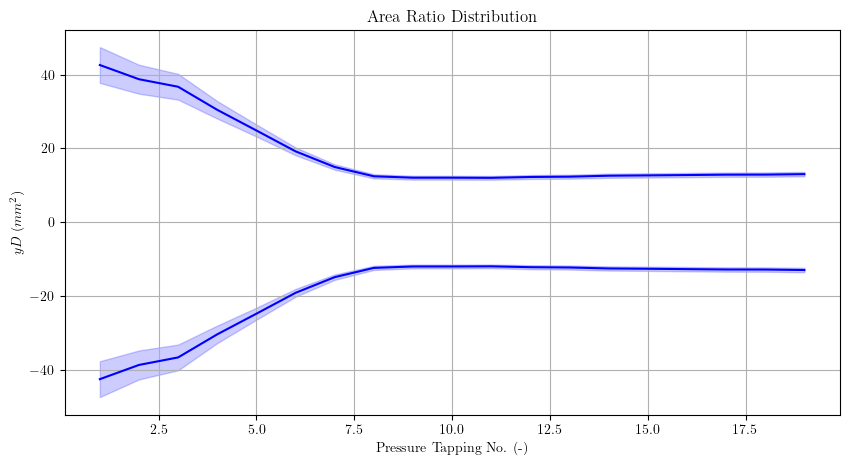

In [164]:
d0 = 0
width = 1 #mm
Astar = 24 # mm^2

def plot_nozzle_profile(ax, x, rA, u_rA):
    d = Astar * rA / width
    u_d = u_rA + 1/Astar

    ax.plot(x, + d / 2, color = 'blue')
    ax.plot(x, - d / 2, color = 'blue')
    ax.fill_between(x, - d / 2 * (1 - u_d), - d / 2 * (1 + u_d), alpha=0.2, color='blue')
    ax.fill_between(x, + d / 2 * (1 - u_d), + d / 2 * (1 + u_d), alpha=0.2, color='blue')

fig,ax = plt.subplots(figsize=(10,5))

plot_nozzle_profile(ax, C2[:,0], C2_AAstar, C2_u_AAstar)
ax.set_xlabel('Pressure Tapping No. (-)')
ax.set_ylabel('$yD$ ($mm^2$)')
ax.set_title('Area Ratio Distribution')
ax.grid()
plt.savefig('area_ratio_distribution.png', dpi=300)
plt.show()
